In [1]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
import numpy as np

In [3]:
path = 'C:/Users/Acer/Downloads/dataset/caltech-101-img'

load = ImageDataGenerator(rescale=1.0/255)

data = load.flow_from_directory(
    path,
    target_size=(64, 64),
    class_mode = 'categorical',
    batch_size=2000
)


Found 9144 images belonging to 102 classes.


In [4]:
x_train, y_train = data[0]
x_test, y_test = data[1]

In [6]:
# a. Load in a pre-trained CNN model trained on a large dataset
path = "C:/Users/Acer/Downloads/dataset/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
pretrainned_model = VGG16(weights=path, include_top=False,input_shape=(64,64,3))

In [7]:
# b. Freeze parameters (weights) in model’s lower convolutional layers

for i in pretrainned_model.layers:
    i.trainable = False

In [9]:
# c. Add custom classifier with several layers of trainable parameters to model
x = keras.layers.Flatten()(pretrainned_model.output)
x = keras.layers.Dense(120, activation='relu')(x)
x = keras.layers.Dropout((0.5))(x)
predictions = keras.layers.Dense(102, activation='softmax')(x)

model = keras.Model(inputs=pretrainned_model.input, outputs=predictions)

In [10]:
# d. Train classifier layers on training data available for task


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
63/63 [==============================] - 40s 618ms/step - loss: 3.9112 - accuracy: 0.2100 - val_loss: 3.2177 - val_accuracy: 0.2970
Epoch 2/3
63/63 [==============================] - 37s 597ms/step - loss: 3.1668 - accuracy: 0.3260 - val_loss: 2.8577 - val_accuracy: 0.3670
Epoch 3/3
63/63 [==============================] - 38s 609ms/step - loss: 2.7548 - accuracy: 0.3900 - val_loss: 2.5532 - val_accuracy: 0.4480


In [14]:
# e. Fine-tune hyper parameters and unfreeze more layers as needed

new_model = VGG16(input_shape=(64,64,3), weights = path, include_top = False)

# freeze
for i in new_model.layers:
    i.trainable = False
    
# unfree last 4
for i in new_model.layers[len(new_model.layers)-4:]:
    i.trainable = True
    

In [17]:
x = keras.layers.Flatten()(new_model.output)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
predictions = keras.layers.Dense(102, activation='softmax')(x)

In [23]:
model = keras.Model(inputs=new_model.input, outputs=predictions)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
63/63 [==============================] - 69s 1s/step - loss: 3.7565 - accuracy: 0.2155 - val_loss: 3.3226 - val_accuracy: 0.2945
Epoch 2/3
63/63 [==============================] - 67s 1s/step - loss: 3.1544 - accuracy: 0.3310 - val_loss: 2.9784 - val_accuracy: 0.3570
Epoch 3/3
63/63 [==============================] - 68s 1s/step - loss: 2.7889 - accuracy: 0.3820 - val_loss: 2.7068 - val_accuracy: 0.3880


In [27]:
labels = list(data.class_indices.keys())

In [29]:
import matplotlib.pyplot as plt
y_predicts = model.predict(x_test)



63/63 [==============================] - 19s 301ms/step


BACKGROUND_Google
grand_piano


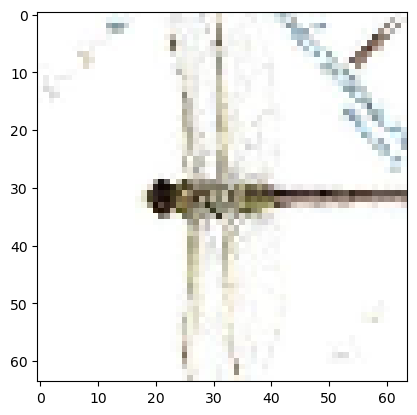

In [31]:
import numpy as np

n = 5
print(labels[np.argmax(x_test[n])])
print(labels[np.argmax(y_predicts[n])])
plt.imshow(x_test[n])

In [32]:
# Object detection using Transfer Learning of CNN architectures
# a. Load in a pre-trained CNN model trained on a large dataset
# b. Freeze parameters (weights) in model’s lower convolutional layers
# c. Add custom classifier with several layers of trainable parameters to model
# d. Train classifier layers on training data available for task
# e. Fine-tune hyper parameters and unfreeze more layers as needed